# Кодирование качественных признаков

Многие модели Data Mining, например, нейронные сети работают только с числовыми данными. Но в качестве исходных данных часто используются бинарные переменные (возможен только один из вариантов — истина или ложь) и
качественные переменные.

**Переменные качественного типа** — это переменные с конечным числом состояний. Причем нельзя ввести расстояние между состояниями. Примером качественной переменной может служить состояние больного — тяжелое, среднее, легкое. Нельзя сказать, что расстояние от легкого больного до среднего больше, меньше или равно расстоянию от среднего больного до тяжелого. Все качественные признаки можно в свою очередь разбить на:

1. Упорядоченные переменные (ординальные переменные — от англ. Order — порядок).
2. Неупорядоченные переменные (категориальные).

Для любых двух состояний **упорядоченной переменной** можно сказать, что одно из них предшествует другому. Тот факт, что состояние с1 c предшествует состоянию c2 обозначается следующим образом: с1<c2.
Примером упорядоченной переменной может служить состояние больного. Действительно, все состояния можно упорядочить по тяжести заболевания:

`легкий больной < средний больной < тяжелый больной`

Поэтому, упорядоченные частные признаки рекомендуется кодировать в виде двоичных векторов, имеющих стольких компонентов, сколько состояний у переменной. Но, в отличие от неупорядоченных переменных необходимо накапливать число единичных компонентов.

Например, если состояния качественной переменной упорядочены следующим образом:  c1<c2<…<cn, то состоянию c1 соответствует вектор [100...0], состоянию c2 соответствует вектор [110...0], состоянию cn соответствует вектор [111...1].

Переменные называются **неупорядоченными**, если никакие два состояния нельзя cвязать естественным в контексте задачи отношением порядка.

Примером неупорядоченного признака может служить ответ на вопрос "Ваш любимый цвет?". Неупорядоченные переменные обозначают один из классов, являются именами категорий. В нашем примере — это названия цветов. При кодировании бинарных признаков "ложь" кодируется как "-1" или "0", а "истина" — как "1".

Для кодирования n значений неупорядоченной переменной используется двоичный вектор из n компонентов. Первая категория кодируется как [100...0], вторая, соответственно — [010...0] и т. д., вплоть до n -ой категории: [000...1].

Часто характеристики задаются не как непрерывные значения, а как категориальные.

Например, человек может иметь функции [«male», «female»][«from Europe», «from US», «from Asia»], [«uses Firefox», «uses Chrome», «uses Safari», «uses Internet Explorer»]. Такие функции могут быть эффективно закодированы как целые числа, например [«male», «from US», «uses Internet Explorer»], может быть выражена как [0, 1, 3] в то время как [«female», «from Asia», «uses Chrome»] было бы [1, 2, 1].




## OrdinalEncoder

мы  будем работать с выборкой о `переписи взрослого населения`.

Как мы видим в выборке присутствуют и числовые и категораильные переменные, числовая переменная - это величина, представленная действительным или целым числом. Эти переменные могут естественным образом обрабатываться алгоритмами машинного обучения, которые обычно состоят из последовательности арифметических инструкций, таких как сложение и умножение.

Напротив, категориальные переменные имеют дискретные значения, обычно представленные строковыми метками (но не только), взятыми из конечного списка возможных вариантов. Например, переменная `native-country` в нашем наборе данных является категориальной переменной, поскольку она кодирует данные с использованием конечного списка возможных стран (наряду с ? символ, когда эта информация отсутствует):

In [1]:
import pandas as pd
import numpy as np
dataset_in = '../dataset/car63.csv'
dataset_out = '../dataset/car73.csv'

df=pd.read_csv(dataset_in, delimiter=',')
df

,Make,Model,Year,Engine Fuel Type,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...
11186,Acura,ZDX,2012,premium unleaded (required),6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,46120
11187,Acura,ZDX,2012,premium unleaded (required),6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,56670
11188,Acura,ZDX,2012,premium unleaded (required),6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,50620
11189,Acura,ZDX,2013,premium unleaded (recommended),6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,50920


In [2]:
df["Make"].value_counts().sort_index()

Make
Acura             246
Alfa Romeo          5
Aston Martin       91
Audi              321
BMW               324
Bentley            74
Bugatti             3
Buick             190
Cadillac          396
Chevrolet        1083
Chrysler          187
Dodge             528
FIAT               62
Ferrari            69
Ford              824
GMC               482
Genesis             3
HUMMER             17
Honda             433
Hyundai           259
Infiniti          328
Kia               229
Lamborghini        52
Land Rover        139
Lexus             202
Lincoln           160
Lotus              28
Maserati           55
Maybach            16
Mazda             412
McLaren             5
Mercedes-Benz     341
Mitsubishi        208
Nissan            551
Oldsmobile        132
Plymouth           71
Pontiac           181
Porsche           136
Rolls-Royce        31
Saab              109
Scion              60
Spyker              2
Subaru            239
Suzuki            339
Tesla              18
Toyot

Выберем объекты на основе их типа данных. Мы будем использовать вспомогательную функцию `scikit-learn` `make_column_selector`, которая позволяет нам выбирать столбцы на основе их типа данных. Мы проиллюстрируем, как использовать этот помощник.

In [3]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

In [4]:
df_cat = df[categorical_columns] #отберем только те столбцы в которых присутствует категориальная перемнная
df_cat.head()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
3,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
4,BMW,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible


Наиболее интуитивная стратегия заключается в кодировании каждой категории другим номером. `OrdinalEncoder` преобразует данные таким образом.

Чтобы преобразовать категориальные признаки в такие целочисленные коды, мы можем использовать расширение `OrdinalEncoder`. Этот оценщик преобразует каждую категориальную характеристику в одну новую характеристику целых чисел (от 0 до n_categories — 1).
Мы начнем с кодирования одного столбца, чтобы понять, как работает кодирование.

In [5]:
from sklearn.preprocessing import OrdinalEncoder

col = 'Make'
education_column = df_cat[[col]]

print(df_cat[col].unique()) #посмотрим какие виды образования присутствуют в выборке

encoder = OrdinalEncoder()   # вызываем кодировщик
encoder  = encoder.fit(df_cat[[col]])
df_cat[col] = encoder.transform(df_cat[[col]])
df_cat


['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


C:\Users\iteco\AppData\Local\Temp\ipykernel_15540\796139442.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = encoder.transform(df_cat[[col]])


,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
0,4.0,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
1,4.0,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
2,4.0,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
3,4.0,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe
4,4.0,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible
...,...,...,...,...,...,...,...
11186,0.0,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11187,0.0,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11188,0.0,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback
11189,0.0,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback


Мы видим, что каждая категория в разделе "Make" была заменена числовым значением. Мы могли бы проверить соответствие между категориями и числовыми значениями, проверив соответствующий атрибут categories_.

In [6]:
print(encoder.categories_)
print(len(encoder.categories_[0]))
print(df_cat[col].unique())
df_cat[col].unique().size

[array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis', 'HUMMER', 'Honda',
       'Hyundai', 'Infiniti', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Lotus', 'Maserati', 'Maybach', 'Mazda', 'McLaren',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
       'Pontiac', 'Porsche', 'Rolls-Royce', 'Saab', 'Scion', 'Spyker',
       'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)]
48
[ 4.  3. 12. 31. 10. 33. 47. 29. 32. 13.  1. 45. 30. 28. 36. 37. 39. 15.
 19. 35. 18. 34. 43. 14.  8. 21.  5.  9. 11. 22. 25. 42. 46. 41.  7.  0.
 38. 27. 24.  2. 23. 26. 20. 40. 16. 17. 44.  6.]


48

Мы видим, что категории были закодированы для каждого объекта (столбца) независимо. Мы также отмечаем, что количество функций до и после кодирования одинаково.

Однако будьте осторожны при применении этой стратегии кодирования: использование этого целочисленного представления приводит к тому, что нижестоящие прогнозирующие модели предполагают, что значения упорядочены (например, 0 < 1 < 2 < 3 ...).

По умолчанию `OrdinalEncoder` использует лексикографическую стратегию для сопоставления меток строковых категорий с целыми числами. Эта стратегия произвольна и часто бессмысленна.

Например, предположим, что в наборе данных есть категориальная переменная с именем "size" с такими категориями, как “S”, “M”, “L”, “XL”. Мы хотели бы, чтобы целочисленное представление учитывало значение размеров, сопоставляя их с возрастающими целыми числами, такими как 0, 1, 2, 3. Однако лексикографическая стратегия, используемая по умолчанию, сопоставляет метки “S”, “M”, “L”, “XL” с 2, 1, 0, 3, следуя алфавитному порядку.

Класс `OrdinalEncoder `принимает аргумент конструктора `categories` для явной передачи категорий в ожидаемом порядке. При необходимости вы можете найти более подробную информацию в документации scikit-learn.

Если категориальная переменная не содержит какой-либо значимой информации о порядке, то эта кодировка может ввести в заблуждение нижестоящие статистические модели, и вы можете рассмотреть возможность использования вместо этого однократного кодирования.

## OneHotEncoder

OneHotEncoder - это альтернативный кодер, который не позволяет нижестоящим моделям делать ложные предположения о порядке категорий. Для данной функции будет создано столько новых столбцов, сколько существует возможных категорий. Для данной выборки значение столбца, соответствующего категории, будет установлено равным 1, в то время как для всех столбцов других категорий будет установлено значение 0.

Еще одна возможность преобразовать категориальные признаки в признаки, которые можно использовать с оценками `scikit-learn`, — это использовать кодировку «один из K», также известную как одноразовое или фиктивное кодирование. Этот тип кодирования может быть получен с помощью `OneHotEncoder`.
Взгляните на эту диаграмму, чтобы лучше понять:

![img](https://drive.google.com/uc?id=14XiZUQQEX0B6uQWRTWITpeCaDEgAEwvf)

Мы начнем с кодирования одной функции (например, "образование"), чтобы проиллюстрировать, как работает кодирование.

Одно горячее кодирование полезно для данных, не связанных друг с другом. Алгоритмы машинного обучения рассматривают порядок чисел как атрибут значимости. Другими словами, они будут считать большее число лучше или более важным, чем меньшее число.

Хотя это полезно для некоторых порядковых ситуаций, некоторые входные данные не имеют ранжирования для значений категорий, и это может привести к проблемам с прогнозами и низкой производительности. Вот когда одно горячее кодирование спасает положение.

Одно горячее кодирование делает наши обучающие данные более полезными и выразительными, и их можно легко масштабировать. Используя числовые значения, нам легче определить вероятность наших значений. В частности, для наших выходных значений используется одна горячая кодировка, поскольку она обеспечивает более детализированные прогнозы, чем отдельные метки.


In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder  = encoder.fit(df_cat[[col]])
education_encoded  = encoder.transform(df_cat[[col]])
education_encoded


C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Мы видим, что кодирование одного объекта даст массив `NumPy`, полный нулей и единиц. Мы можем получить лучшее представление, используя связанные имена объектов, полученные в результате преобразования.

In [8]:
feature_names = encoder.get_feature_names_out(input_features=[col]) # получаем виды образования и на их основе создаем столбцы
education_encoded = pd.DataFrame(education_encoded, columns=feature_names)
education_encoded

,Make_0.0,Make_1.0,Make_2.0,Make_3.0,Make_4.0,Make_5.0,Make_6.0,Make_7.0,Make_8.0,Make_9.0,...,Make_38.0,Make_39.0,Make_40.0,Make_41.0,Make_42.0,Make_43.0,Make_44.0,Make_45.0,Make_46.0,Make_47.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11187,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_cat_new=df_cat.join(education_encoded)
df_cat_new=df_cat_new.drop(df_cat_new[[col]],axis=1)
df_cat_new

,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,Make_0.0,Make_1.0,Make_2.0,Make_3.0,...,Make_38.0,Make_39.0,Make_40.0,Make_41.0,Make_42.0,Make_43.0,Make_44.0,Make_45.0,Make_46.0,Make_47.0
0,1 Series M,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Coupe,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1 Series,premium unleaded (required),MANUAL,rear wheel drive,Compact,Convertible,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11187,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11188,ZDX,premium unleaded (required),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11189,ZDX,premium unleaded (recommended),AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Этот способ не всегда лучше Ярлычного кодирования (Label Encoding), хотя бы потому, что является низкоэффективным способом хранения данных (число столбцов резко увеличивается). Просто у него своя специализация.

## Label Encoding

Этот подход очень прост и включает в себя преобразование каждого значения в столбце в число.

In [10]:
from sklearn.preprocessing import LabelEncoder

col = 'Transmission Type'
encoder = LabelEncoder()   # вызываем кодировщик
encoder  = encoder.fit(df_cat[[col]])
df_cat[col] = encoder.transform(df_cat[[col]])
df_cat

C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\iteco\AppData\Local\Temp\ipykernel_15540\1077405886.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = encod

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
0,4.0,1 Series M,premium unleaded (required),3,rear wheel drive,Compact,Coupe
1,4.0,1 Series,premium unleaded (required),3,rear wheel drive,Compact,Convertible
2,4.0,1 Series,premium unleaded (required),3,rear wheel drive,Compact,Coupe
3,4.0,1 Series,premium unleaded (required),3,rear wheel drive,Compact,Coupe
4,4.0,1 Series,premium unleaded (required),3,rear wheel drive,Compact,Convertible
...,...,...,...,...,...,...,...
11186,0.0,ZDX,premium unleaded (required),1,all wheel drive,Midsize,4dr Hatchback
11187,0.0,ZDX,premium unleaded (required),1,all wheel drive,Midsize,4dr Hatchback
11188,0.0,ZDX,premium unleaded (required),1,all wheel drive,Midsize,4dr Hatchback
11189,0.0,ZDX,premium unleaded (recommended),1,all wheel drive,Midsize,4dr Hatchback


In [11]:
print(encoder.classes_)
print(len(encoder.classes_))
print(df_cat[col].unique())
df_cat[col].unique().size

['AUTOMATED_MANUAL' 'AUTOMATIC' 'DIRECT_DRIVE' 'MANUAL' 'UNKNOWN']
5
[3 1 0 2 4]


5

В целом, это и есть кодирование признаков. Но в зависимости от данных это преобразование создаёт новую проблему. Мы перевели набор стран в набор чисел. Но это всего лишь категориальные данные, и между числами на самом деле нет никакой связи.


Проблема здесь в том, что, поскольку разные числа в одном столбце, модель неправильно подумает, что данные находятся в каком-то особом порядке — 0 < 1 < 2 Хотя это, конечно, совсем не так.

In [12]:
categorical_features = df_cat.select_dtypes(include=['object'])
categorical_features = categorical_features.apply(encoder.fit_transform)
df_cat[categorical_features.columns] = categorical_features
df_cat

C:\Users\iteco\AppData\Local\Temp\ipykernel_15540\2269216496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[categorical_features.columns] = categorical_features


,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
0,4.0,1,8,3,3,0,8
1,4.0,0,8,3,3,0,6
2,4.0,0,8,3,3,0,8
3,4.0,0,8,3,3,0,8
4,4.0,0,8,3,3,0,6
...,...,...,...,...,...,...,...
11186,0.0,901,8,1,0,2,2
11187,0.0,901,8,1,0,2,2
11188,0.0,901,8,1,0,2,2
11189,0.0,901,7,1,0,2,2


In [13]:
# data_new = df
# col = df_cat.columns
# data_new[col]=df_cat
# data_new.to_csv(path_or_buf='../dataset/car7.csv',index=False)
# data_new.select_dtypes(include=[np.number])
# data_new = data_new.drop(['Model'], axis=1)
# # data_new['Driven_Wheels'] = data_new['Driven_Wheels'].replace('four wheel drive', 'all wheel drive')
# data_new['Driven_Wheels'] = data_new['Driven_Wheels'].replace(3, 2)

Признак "Model" содержит 9000 различных переменных и не информативен, поэтому удален из набора.
Признак Drien_Wheels значения 'four wheel drive' и 'all wheel drive' это одно ии тоже, поэтому один из них заменен на другой в наборе

In [14]:
data_new = df.drop(['Model'], axis=1)
# data_new['Driven_Wheels'] = data_new['Driven_Wheels'].replace('four wheel drive', 'all wheel drive')
data_new['Engine Cylinders'] = data_new['Engine Cylinders'].astype(int)
# data_new['Number of Doors'] = data_new['Number of Doors'].astype(int)

In [15]:
for column in data_new.columns:
    if len(data_new[column].unique()) < 20:
        print(column,len(data_new[column].unique()), data_new[column].unique())
    else:
        print(column,len(data_new[column].unique())," > 20")
        
    print()

Make 48  > 20

Year 28  > 20

Engine Fuel Type 10 ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)']

Engine Cylinders 8 [ 6  4  5  8 12 10  3 16]

Transmission Type 5 ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']

Driven_Wheels 4 ['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']

Vehicle Size 3 ['Compact' 'Midsize' 'Large']

Vehicle Style 16 ['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback' '2dr Hatchback'
 '4dr SUV' 'Passenger Minivan' 'Cargo Minivan' 'Crew Cab Pickup'
 'Regular Cab Pickup' 'Extended Cab Pickup' '2dr SUV' 'Cargo Van'
 'Convertible SUV' 'Passenger Van']

highway MPG 59  > 20

city mpg 69  > 20

MSRP 6048  > 20



| Label                 | Count |
|-----------------------|-------|
| Make                  | 48    |
| Engine Fuel Type      | 10    |
| Engine Cylinders      | 8     |
| Vehicle Style         | 16    |

| OneHot                | Count |
|-----------------------|-------|
| Transmission Type     | 5     |
| Driven_Wheels         | 3     |
| Number of Doors       | 3     |
| Vehicle Size          | 3     |

| Числовые              | Count |
|-----------------------|-------|
| Engine HP             | 356   |
| MSRP                  | 6048  |    |

In [16]:
required_columns = ['Make','Year','Engine Fuel Type','Engine Cylinders','Vehicle Style']
cols = list(set(required_columns).intersection(data_new.columns))
categorical_features = data_new[cols]
categorical_features = categorical_features.apply(encoder.fit_transform)
data_new[categorical_features.columns] = categorical_features
data_new

,Make,Year,Engine Fuel Type,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,4,21,8,3,MANUAL,rear wheel drive,Compact,8,26,19,46135
1,4,21,8,3,MANUAL,rear wheel drive,Compact,6,28,19,40650
2,4,21,8,3,MANUAL,rear wheel drive,Compact,8,28,20,36350
3,4,21,8,3,MANUAL,rear wheel drive,Compact,8,28,18,29450
4,4,21,8,3,MANUAL,rear wheel drive,Compact,6,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...
11186,0,22,8,3,AUTOMATIC,all wheel drive,Midsize,2,23,16,46120
11187,0,22,8,3,AUTOMATIC,all wheel drive,Midsize,2,23,16,56670
11188,0,22,8,3,AUTOMATIC,all wheel drive,Midsize,2,23,16,50620
11189,0,23,7,3,AUTOMATIC,all wheel drive,Midsize,2,23,16,50920


In [17]:
required_columns = ['Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size']
cols = list(set(required_columns).intersection(data_new.columns))
feature_encoded = data_new[cols]
encoder = OneHotEncoder(sparse=False)
for i in range(len(feature_encoded.columns)):
    encoder = encoder.fit(feature_encoded[[feature_encoded.columns[i]]])
    # Применяем кодирование категориальных признаков
    feature_encoded_2 = encoder.transform(feature_encoded[[feature_encoded.columns[i]]])
    # Удаляем исходные категориальные признаки
    data_new = data_new.drop([feature_encoded.columns[i]], axis=1)
    # Получаем имена новых столбцов
    feature_names = encoder.get_feature_names_out(input_features=[feature_encoded.columns[i]]) # получаем виды образования и на их основе создаем столбцы
    data_new = data_new.join(pd.DataFrame(feature_encoded_2, columns=feature_names))
   
data_new

C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\iteco\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Make,Year,Engine Fuel Type,Engine Cylinders,Vehicle Style,highway MPG,city mpg,MSRP,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive
0,4,21,8,3,8,26,19,46135,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,21,8,3,6,28,19,40650,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,21,8,3,8,28,20,36350,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,21,8,3,8,28,18,29450,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,21,8,3,6,28,18,34500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,0,22,8,3,2,23,16,46120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11187,0,22,8,3,2,23,16,56670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11188,0,22,8,3,2,23,16,50620,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11189,0,23,7,3,2,23,16,50920,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


Сохраним датасет без масштабирования

# Масштабирование признаков

Ряд методов машинного обучения, например линейная и логистическая регрессии, кластерный анализ,
нейронные сети и SVM, чувствительны к масштабу признаков. Если не привести признаки к единому масштабу, то прогноз будут определять признаки, имеющие наибольшую разрядность и соответственно наибольшую дисперсию.

Поэтому обычной практикой является преобразование признаков, с тем чтобы итоговое представление данных было более подходящим для использования вышеупомянутых алгоритмов. Часто достаточно процедуры приведения признаков к единому масштабу, которую называют масштабированием (scaling) или стандартизацией (standardization).

Для кластерного анализа он помогает сделать признаки равноправными в образовании кластеров. В методе опорных векторов единый масштаб дает признакам одинаковое влияние при вычислении расстояния между разделяющей гиперплоскостью и объектами разделяемых классов. Для регрессионного анализа единый масштаб позволяет сравнивать регрессионные коэффициенты между собой при признаках и
корректно применять регуляризацию.

А вот деревьям решений стандартизация не нужна. Деревья вместо абсолютных значений работают с пороговыми значениями – разделяющими значениями признаков, по которым разбивают выборку наблюдений на два узла (если деревья являются бинарными, например деревья CART, QUEST) и более
(если деревья могут иметь более двух потомков, например CHAID). Допустим, дерево принимает решение разбить выборку по признаку Возраст в значении 60, мы сравниваем все наблюдения с этим порогом, наблюдения <= 60 лет
идут в левый узел, а наблюдения > 60 лет – в правый узел.



Стандартизация наборов данных является общим требованием для многих методов машинного обучения, реализованных в scikit-learn; они могут вести себя плохо, если отдельные показатели не выглядят как стандартные нормально распределенные данные: гауссовские с нулевым средним и единичной дисперсией.


Известны два способа масштабирования: масштабирование по минимаксу (`min max scaling`), или нормализация (`normalization`) и стандартизация (`standardization, StandardScaling`, называемая также `Z-score normalization`). Нормализация — это приведение переменных к одному диапазону. Стандартизация — преобразование переменных к значениям с нулевым математическим ожиданием и единичной дисперсией.

Стандартизированное значение признака рассчитывается следующим образом

![img](https://drive.google.com/uc?id=1vwLIu2t_OikyRemsyfi2IJrI2l7ers1m)

В стандартизации нуждаются лишь количественные переменные. Если речь идет о регрессионном анализе, категориальные переменные будут записаны в виде дамми-переменных со значениями 0 или 1 и дамми-переменные стандартизировать не нужно. В случае присутствия дамми-переменных рекомендуется при выполнении стандартизации количественных переменных делить не на одно, а на два стандартных отклонения, чтобы и дамми-переменные, и количественные переменные имели один и тот же масштаб (и мы могли срав- нивать коэффициенты при них), стандартные отклонения дамми-переменных и
количественных переменных будут примерно равны 0,5, в противном случае стандартные отклонения дамми-переменных будут равны 0,5, а стандартные отклонения количественных переменных – 1.

Обратите внимание: стандартизация не меняет форму распределения и не заменяет собой нормализацию
распределения переменных, если переменная арактеризовалась правосторонней асимметрией, эта асимметрия так останется и после стандартизации. Также следует отметить, что ни один из способов стандартизации не в состоянии удалить выбросы и стандартизация всегда проводится после обработки выбросов.


Модуль` preprocessing` предоставляет `StandardScaler` вспомогательный класс, который является быстрым и простым способом, чтобы выполнить следующую операцию на массив-типа набора данных:


In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X_train = df_cat[['Make',col]]

scaler = StandardScaler()
scaler.fit(X_train)
print('Математическое ожидание')
print(scaler.mean_)

print('Дисперсия')
print(scaler.var_)

print('Преобразованный набор')
print(scaler.transform(X_train))


Математическое ожидание
[22.84264141  1.43043517]
Дисперсия
[206.36939429   0.82098059]
Преобразованный набор
[[-1.31165355  1.73225895]
 [-1.31165355  1.73225895]
 [-1.31165355  1.73225895]
 ...
 [-1.59009722 -0.47505217]
 [-1.59009722 -0.47505217]
 [ 0.15017571 -0.47505217]]


##MinMaxScaler  
Альтернативная стандартизация — это масштабирование функций таким образом, чтобы они находились между заданным минимальным и максимальным значением, часто между нулем и единицей, или так, чтобы максимальное абсолютное значение каждой функции масштабировалось до размера единицы. Этого можно добиться с помощью MinMaxScaler или MaxAbsScaler соответственно.

Мотивация к использованию этого масштабирования включает устойчивость к очень небольшим стандартным отклонениям функций и сохранение нулевых записей в разреженных данных.
Если   — допустимый диапазон изменения масштабируемых признаков, то масштабирование описывается формулой

![img](https://drive.google.com/uc?id=1jCgK2nV0D-fWvrPD1Ib_cQPPqXagOGCV)

In [19]:
from sklearn.preprocessing import MinMaxScaler
X_train = df_cat[['Make',col]]

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax


array([[0.08510638, 0.75      ],
       [0.08510638, 0.75      ],
       [0.08510638, 0.75      ],
       ...,
       [0.        , 0.25      ],
       [0.        , 0.25      ],
       [0.53191489, 0.25      ]])

## MaxAbsScaler
Она работает очень похожим образом, но масштабируется таким образом, что обучающие данные лежат в пределах диапазона [-1, 1], путем деления на наибольшее максимальное значение в каждой функции. Он предназначен для данных, которые уже сосредоточены на нуле или разреженных данных.
Вот как использовать данные игрушки из предыдущего примера с этим скейлером:


In [20]:
df1 = df.select_dtypes(include=[np.number])
df1

,Year,Engine Cylinders,highway MPG,city mpg,MSRP
0,2011,6.0,26,19,46135
1,2011,6.0,28,19,40650
2,2011,6.0,28,20,36350
3,2011,6.0,28,18,29450
4,2011,6.0,28,18,34500
...,...,...,...,...,...
11186,2012,6.0,23,16,46120
11187,2012,6.0,23,16,56670
11188,2012,6.0,23,16,50620
11189,2013,6.0,23,16,50920


In [21]:
from sklearn.preprocessing import MaxAbsScaler
required_columns = ['Engine HP', 'highway MPG', 'city mpg']
cols = list(set(required_columns).intersection(data_new.columns))
data_new[cols] = MaxAbsScaler().fit_transform(data_new[cols])
data_new

,Make,Year,Engine Fuel Type,Engine Cylinders,Vehicle Style,highway MPG,city mpg,MSRP,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive
0,4,21,8,3,8,0.073446,0.138686,46135,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,21,8,3,6,0.079096,0.138686,40650,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,21,8,3,8,0.079096,0.145985,36350,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,21,8,3,8,0.079096,0.131387,29450,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,21,8,3,6,0.079096,0.131387,34500,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,0,22,8,3,2,0.064972,0.116788,46120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11187,0,22,8,3,2,0.064972,0.116788,56670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11188,0,22,8,3,2,0.064972,0.116788,50620,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11189,0,23,7,3,2,0.064972,0.116788,50920,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [22]:
data_new.describe()

,Make,Year,Engine Fuel Type,Engine Cylinders,Vehicle Style,highway MPG,city mpg,MSRP,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive
count,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,1.119100e+04,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000,11191.000000
mean,22.842641,20.716826,7.964972,2.446788,8.367170,0.075171,0.144035,4.193953e+04,0.049415,0.708158,0.006076,0.235278,0.001072,0.392548,0.239746,0.367706,0.206237,0.118399,0.388437,0.286927
std,14.366205,7.227007,1.827705,1.295557,4.870424,0.025368,0.067012,6.155437e+04,0.216742,0.454630,0.077717,0.424192,0.032730,0.488339,0.426948,0.482202,0.404621,0.323094,0.487417,0.452347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.033898,0.051095,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,17.000000,8.000000,1.000000,3.000000,0.062147,0.116788,2.160000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,25.000000,9.000000,3.000000,8.000000,0.070621,0.131387,3.067500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.000000,26.000000,9.000000,3.000000,14.000000,0.084746,0.160584,4.304500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,47.000000,27.000000,9.000000,7.000000,15.000000,1.000000,1.000000,2.065902e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


| English | Русский |
| ------- | ------- |
| Make | Делать |
| Engine Fuel Type | Тип топлива двигателя |
| Engine HP | Мощность двигателя |
| Engine Cylinders | Цилиндры двигателя |
| Transmission Type | Тип трансмиссии |
| Driven_Wheels | Ведомые_колеса |
| Number of Doors | Количество дверей |
| Vehicle Size | Размер автомобиля |
| Vehicle Style | Стиль автомобиля |
| MSRP | Рекомендуемая розничная цена | 

In [23]:

category2 = 'MSRP'

meanPrice=data_new[category2].median()
print(data_new[category2].min())
print(data_new[category2].max())
print(data_new[category2].mean())
print(data_new[category2].median())

2000
2065902
41939.532302743275
30675.0


In [24]:
data_new[category2] = data_new[category2].apply(lambda x: 1 if x > meanPrice else 0)
data_new[category2]

0        1
1        1
2        1
3        0
4        1
        ..
11186    1
11187    1
11188    1
11189    1
11190    0
Name: MSRP, Length: 11191, dtype: int64

In [25]:
count_1 = data_new[category2][(data_new[category2] == 1)].value_counts()
count_0 = data_new[category2][(data_new[category2] == 0)].value_counts()
print(count_1)
print(count_0)

MSRP
1    5595
Name: count, dtype: int64
MSRP
0    5596
Name: count, dtype: int64


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
def stat(data, category):
    target_count = data[category].value_counts(dropna=True)
    print(target_count)
    target_count = data[category].value_counts(normalize=True, dropna=True)
    print(target_count)
    sns.countplot(x=category, data=data)
    plt.box(False)
    plt.xlabel('Outcome 1/0',fontsize=11)
    plt.ylabel('Количество наблюдений',fontsize=11)
    plt.show()

MSRP
0    5596
1    5595
Name: count, dtype: int64
MSRP
0    0.500045
1    0.499955
Name: proportion, dtype: float64


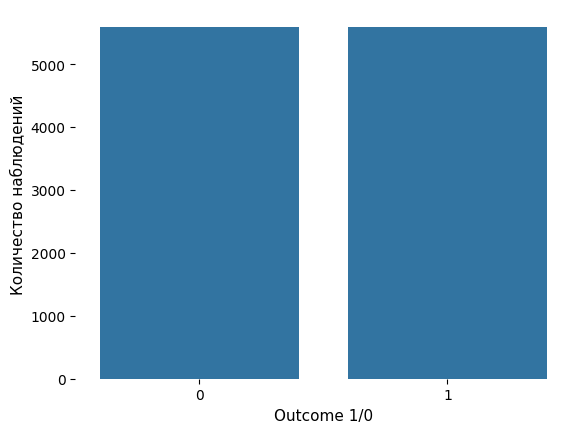

In [27]:
stat(data_new, category2)

Стратифицированный сэмплинг


In [28]:
data_new.to_csv(path_or_buf=dataset_out,index=False)
data_new

,Make,Year,Engine Fuel Type,Engine Cylinders,Vehicle Style,highway MPG,city mpg,MSRP,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Vehicle Size_Compact,Vehicle Size_Large,Vehicle Size_Midsize,Driven_Wheels_all wheel drive,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive
0,4,21,8,3,8,0.073446,0.138686,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,21,8,3,6,0.079096,0.138686,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,21,8,3,8,0.079096,0.145985,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,21,8,3,8,0.079096,0.131387,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,21,8,3,6,0.079096,0.131387,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11186,0,22,8,3,2,0.064972,0.116788,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11187,0,22,8,3,2,0.064972,0.116788,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11188,0,22,8,3,2,0.064972,0.116788,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11189,0,23,7,3,2,0.064972,0.116788,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
